In [17]:
from modules import solve_2D_schrodinger as s2ds
import numpy as np
import sys,os
%pylab notebook

Populating the interactive namespace from numpy and matplotlib


/opt/anaconda3/envs/hp/lib/python3.7/site-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['pad']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [11]:
sn={}

In [3]:
%%time

N=60 ; V0=1e5 ; pad=0.05
accuracy_array=[2,4,6,8]

s={}
s[N]={}
for accuracy in accuracy_array:
    s[accuracy]=s2ds.setup_2d_schrodinger(N=N,pad=pad,V0=V0,accuracy=accuracy)
    s[accuracy].get_potential("SW")
    s[accuracy].get_eigen()
sn[N]=s

L=2-4.*pad
Ethry=[]
for nx in range(120):
    for ny in range(120):
        Ethry=Ethry + [pi**2*((nx+1)**2+(ny+1)**2.)/L**2.]
Ethry=np.sort(Ethry)

CPU times: user 4min 10s, sys: 2.43 s, total: 4min 12s
Wall time: 35 s


<IPython.core.display.Javascript object>


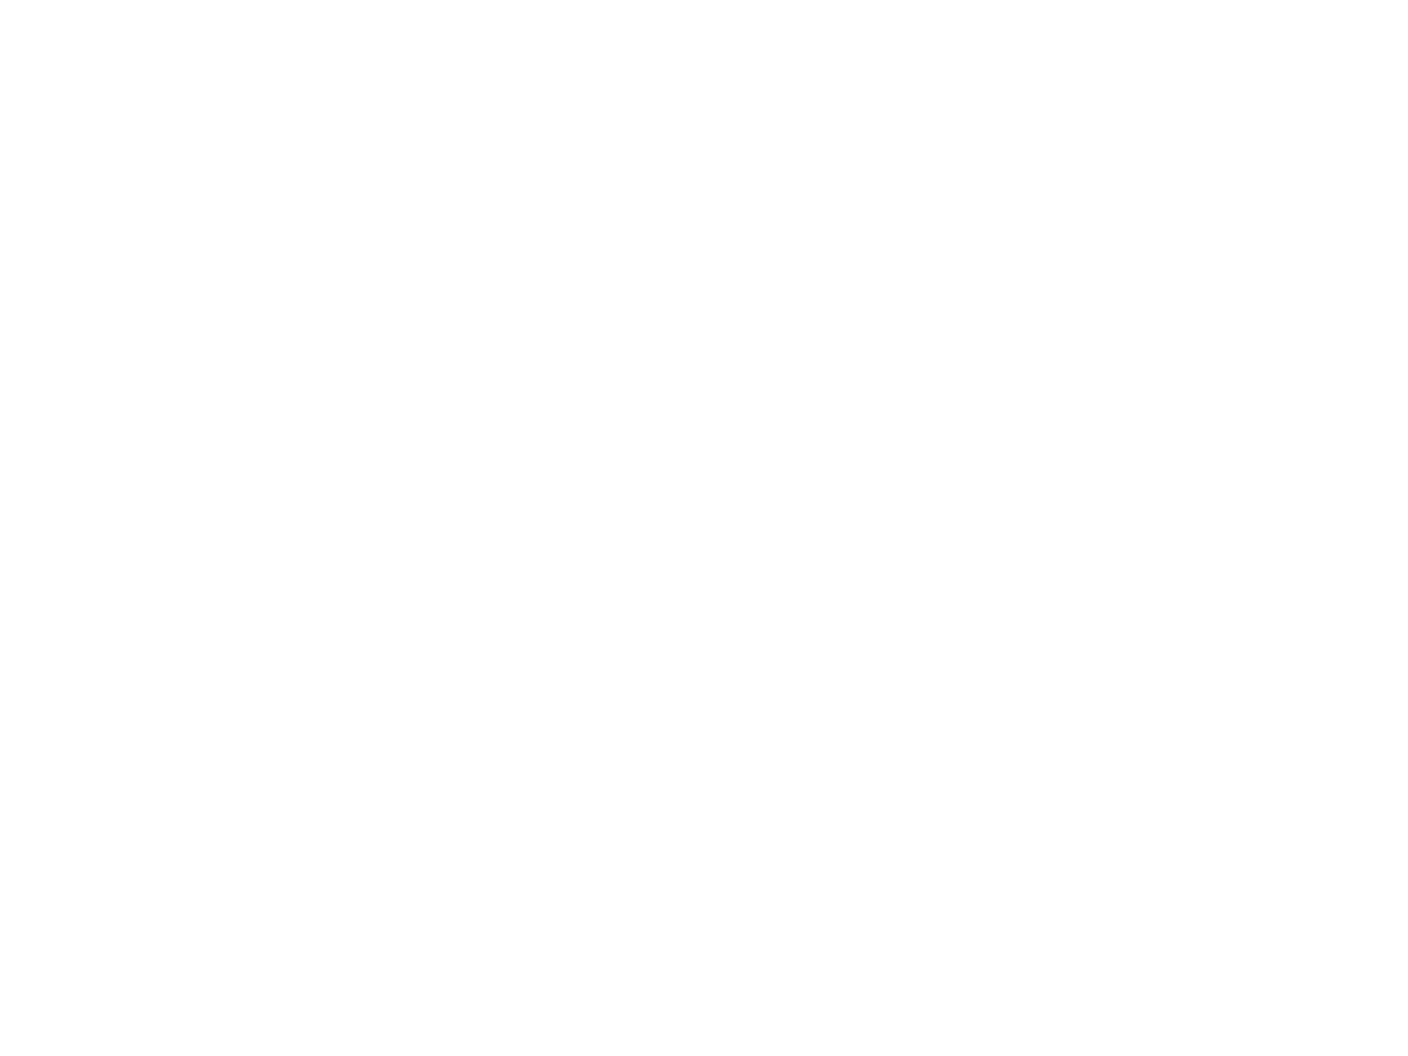

KeyError: 60

In [4]:
figure()
for acc in accuracy_array:
    plot(sn[N][acc].En+V0,label=acc)
plot(Ethry[:len(sn[N][acc].En)],"k-")
title("N="+str(N))
ylim(min(Ethry[:len(sn[N][acc].En)]),max(Ethry[:len(s[acc].En)]))
legend(loc=0)
ylabel("$E_n$",fontsize=12)
xlabel("Quantum state",fontsize=12)
grid(which="both",ls="--",alpha=0.3)

figure()
for acc in accuracy_array:
    plot((sn[N][acc].En+V0)/Ethry[:len(sn[N][acc].En)],label=acc)
legend(loc=0)
ylabel(r"$E_n/E_n^{\rm Thry}$",fontsize=12)
xlabel("Quantum state",fontsize=12)
title("N="+str(N))
ylim(0.75,1.2)
grid(which="both",ls="--",alpha=0.3)

In [5]:
(50./45.)**2

1.234567901234568

<IPython.core.display.Javascript object>


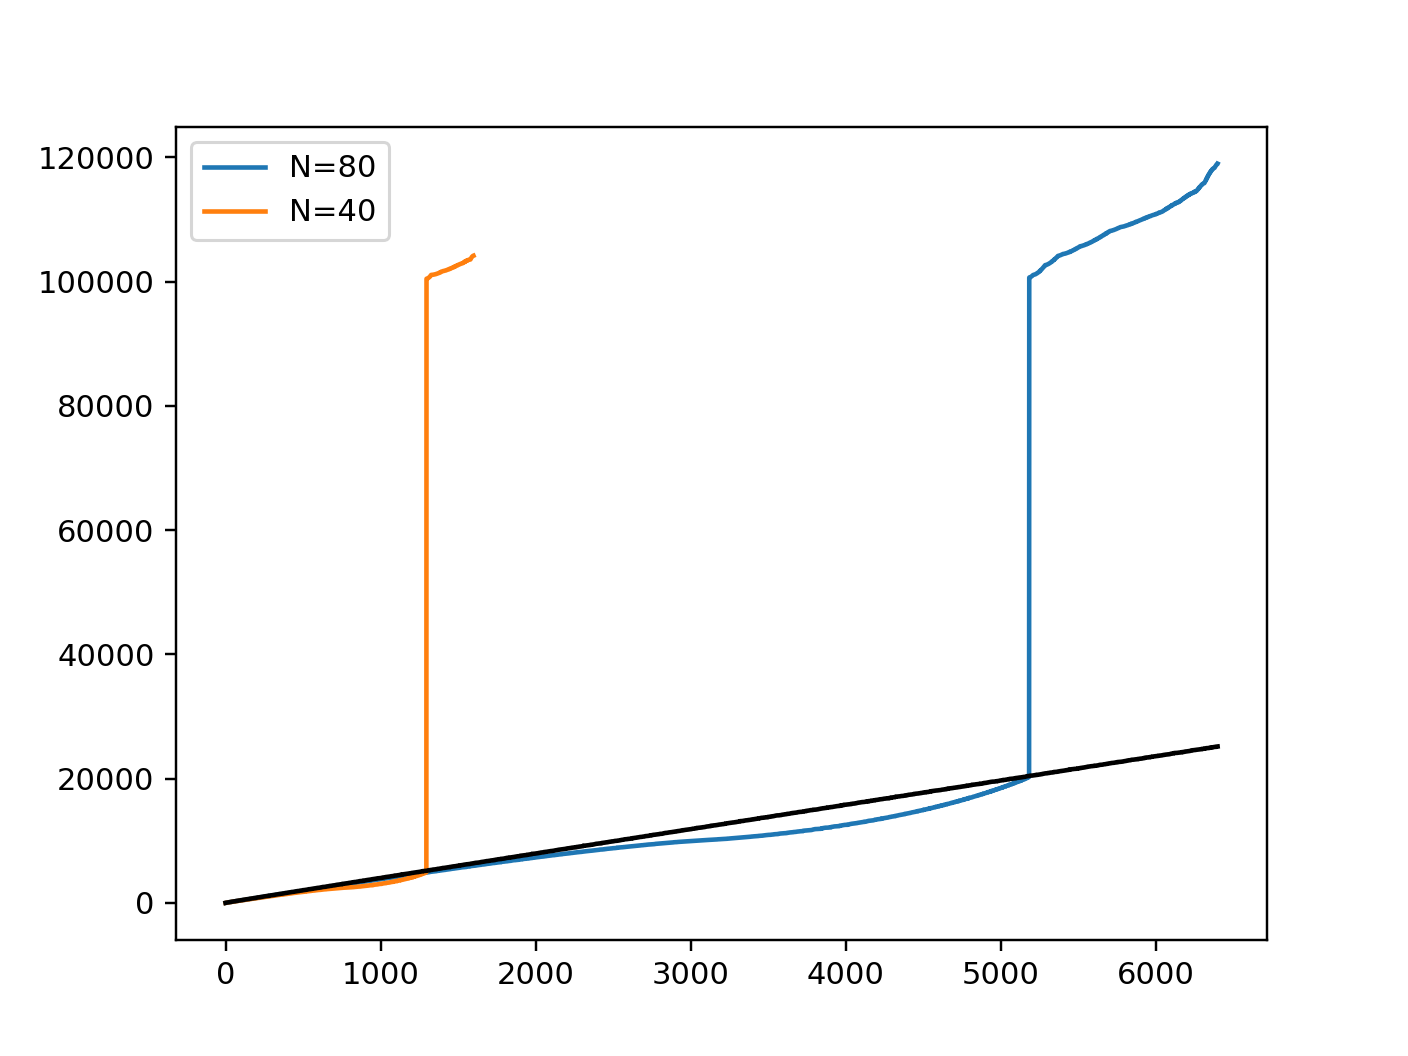

<IPython.core.display.Javascript object>


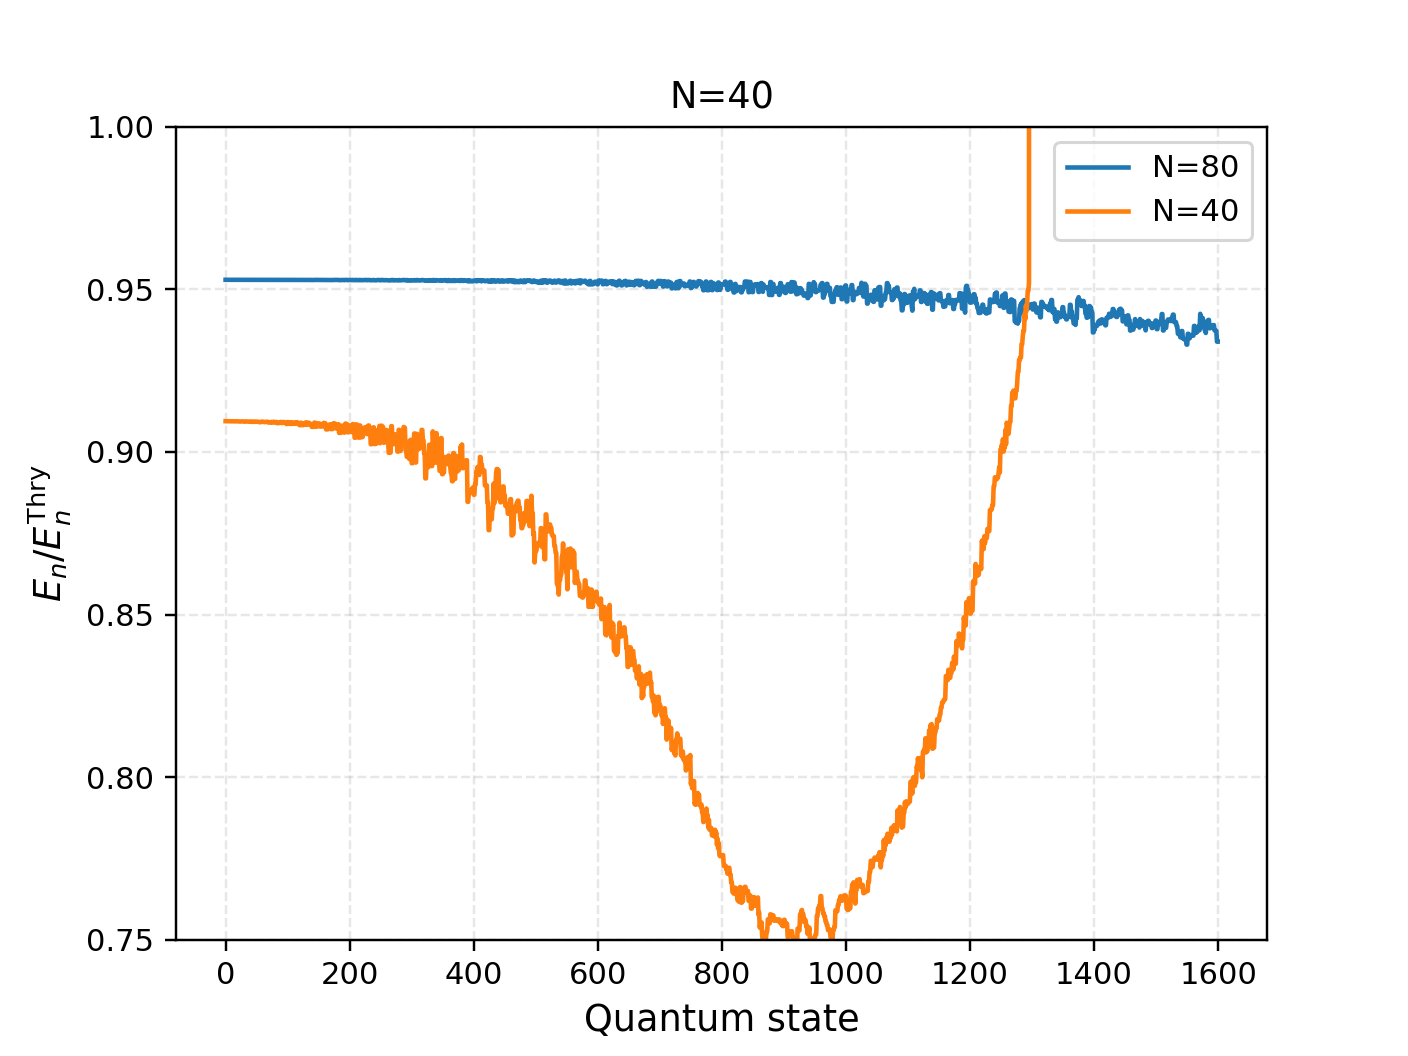

In [33]:
figure()
plot(sn[80][8].En+V0,label="N=80")
plot(sn[40][8].En+V0,label="N=40")
plot(Ethry[:len(sn[80][8].En)],"k-")
legend(loc=0)

figure()
plot((sn[80][8].En[:len(sn[40][8].En)]+V0)/Ethry[:len(sn[40][8].En)],label="N=80")
plot((sn[40][8].En+V0)/Ethry[:len(sn[40][8].En)],label="N=40")
legend(loc=0)
ylabel(r"$E_n/E_n^{\rm Thry}$",fontsize=12)
xlabel("Quantum state",fontsize=12)
title("N="+str(N))
ylim(0.75,1)
grid(which="both",ls="--",alpha=0.3)

# Tomographic image

In [12]:
N=40 ; pad=0.05 ; V0=1e5 ; accuracy=8
stopo={}
stopo[3]=s2ds.setup_2d_schrodinger(N=N,pad=pad,V0=V0,accuracy=accuracy,jmp=3)
stopo[2]=s2ds.setup_2d_schrodinger(N=N,pad=pad,V0=V0,accuracy=accuracy,jmp=2)

In [13]:
impath="./data/"
imgfile=os.path.abspath(impath) + "/18d02T0010.txt"

In [14]:
stopo[2].get_potential("TOPO",imgfile=imgfile)
stopo[3].get_potential("TOPO",imgfile=imgfile)

In [15]:
stopo[2].get_eigen()
stopo[3].get_eigen()

<IPython.core.display.Javascript object>


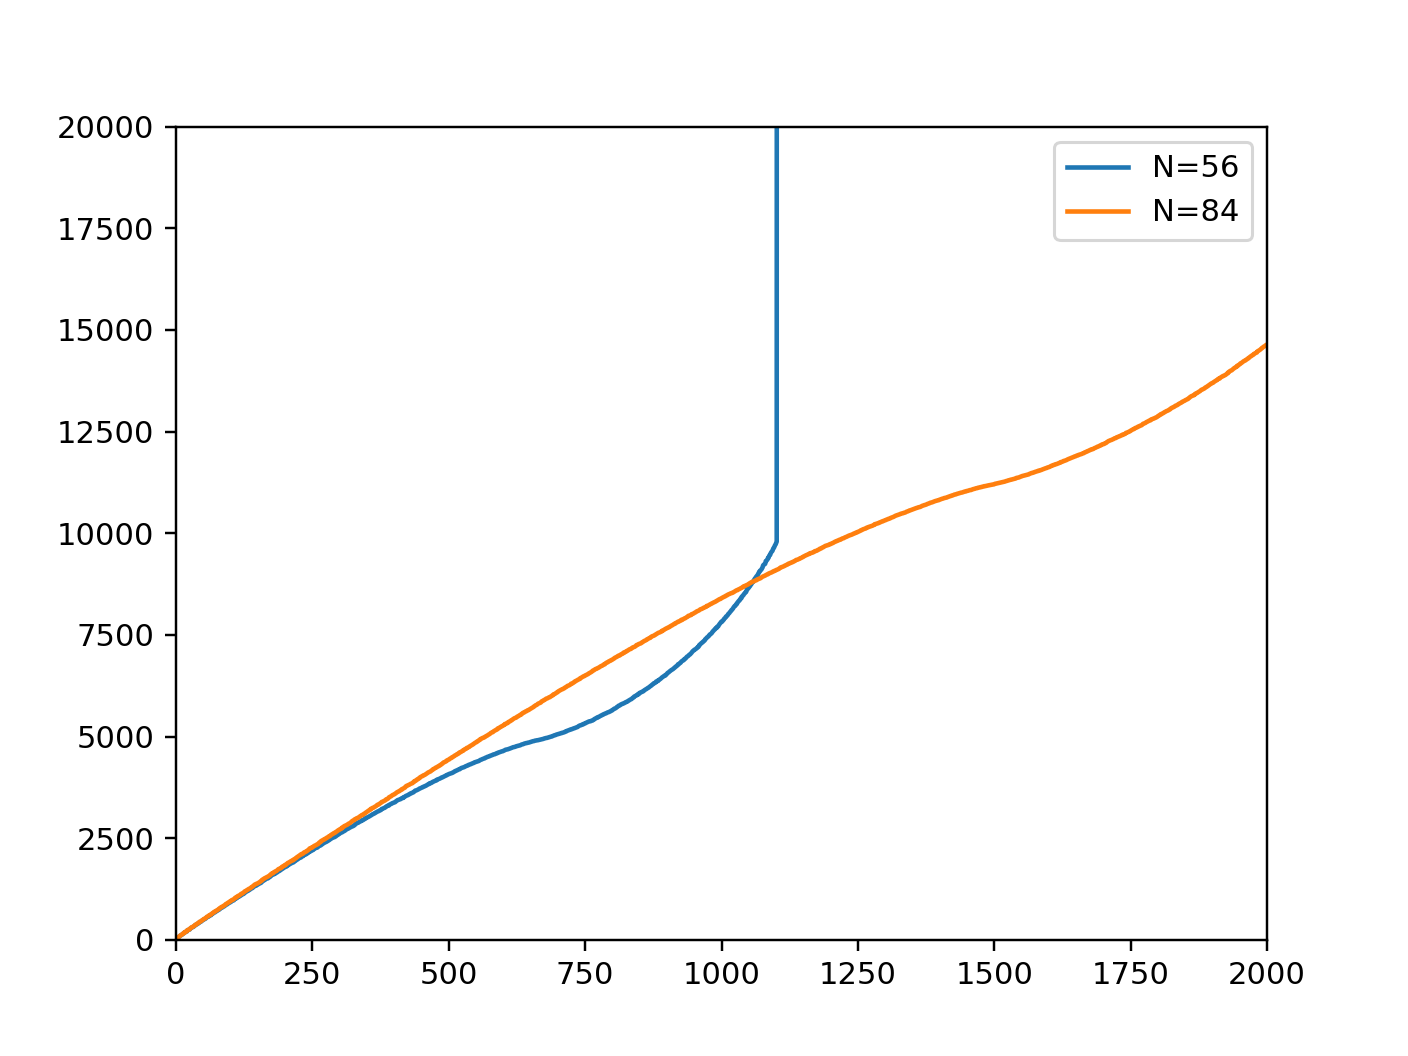

(0.0, 20000.0)

In [18]:
figure()
plot(stopo[3].En+stopo[3].V0,label="N="+str(stopo[3].N))
plot(stopo[2].En+stopo[2].V0,label="N="+str(stopo[2].N))
legend(loc=0)
xlim(0,2000)
ylim(0,20000)

<IPython.core.display.Javascript object>


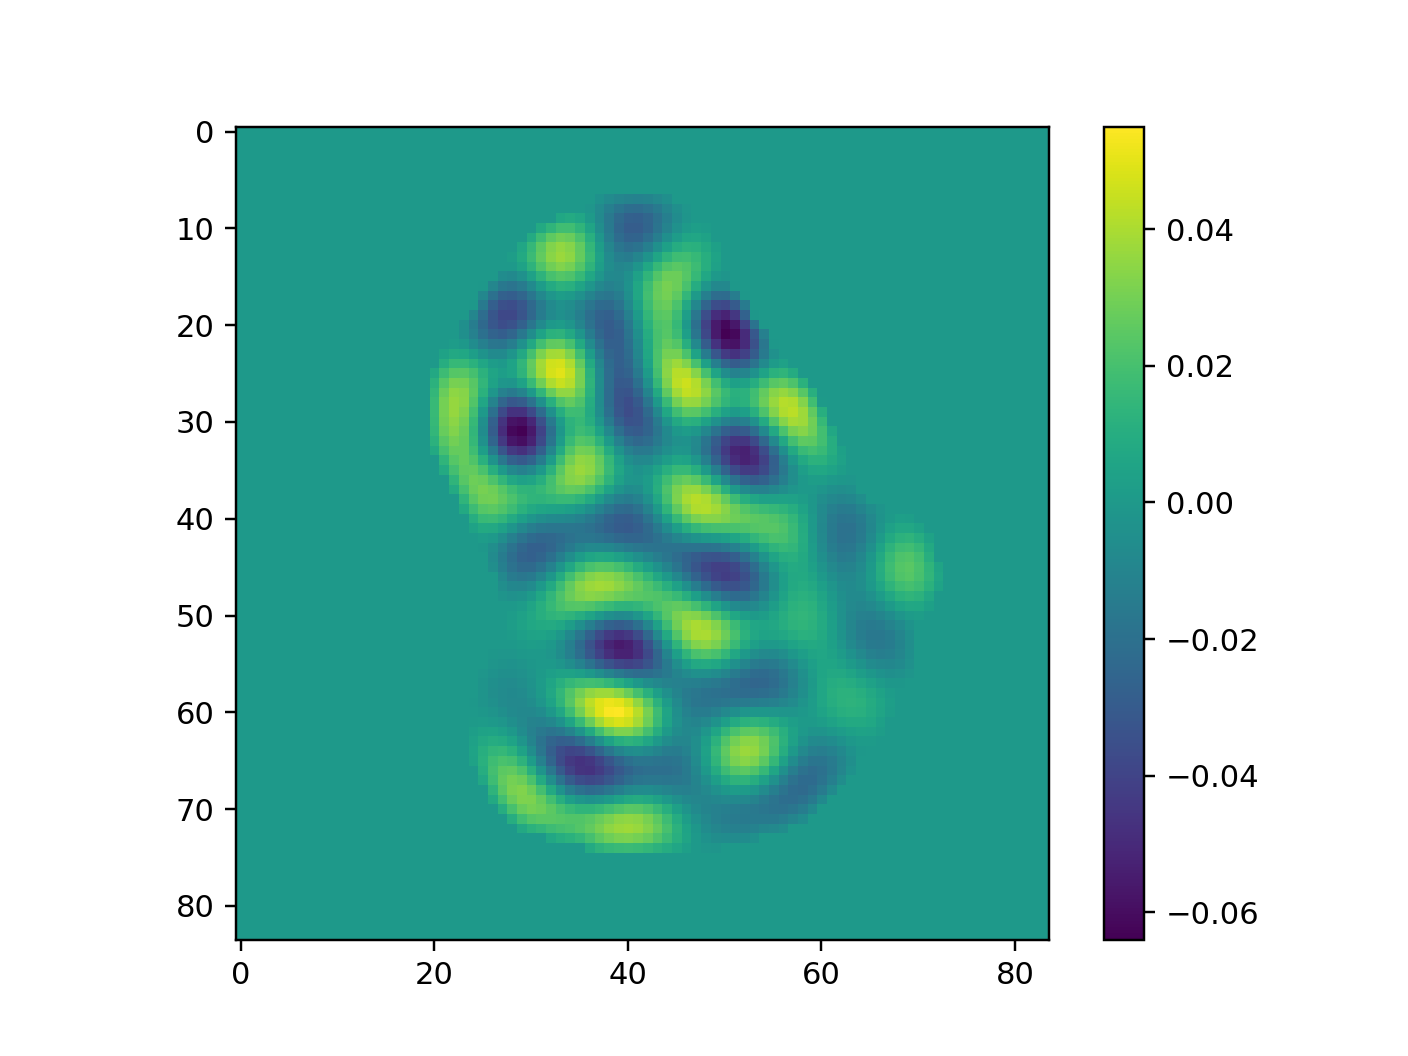

In [21]:
figure()
imshow(stopo[2].psi[54,])
colorbar()

# Normalization to give energy in electron volt units

In [22]:
h=6.626e-34
hbar=h/2./np.pi
ech=1.60217662e-19
csol=299792458.
me=9.10938356e-31
Tilesize=20.
lnorm=Tilesize*1e-9/2.
Enorm=((hbar**2/ (2.*me))/ech)/(lnorm**2.)

# 3d well energy estimates

In [24]:
nzlayer=5
Lz=0.285*nzlayer*1e-9 #m
zenergy=(((hbar*np.pi)**2./ (2.*me))/ech)*1e3*((arange(400.)+1.)**2./Lz**2)
zenergy=zenergy[zenergy<=max(zenergy[zenergy<stopo[2].V0])]
En2d=Enorm*(stopo[2].En+stopo[2].V0)*1e3

En3d={}
En3d[2]=[]
for j, Ez in enumerate(zenergy):
    En3d[2]=En3d[2] + list(En2d[:2000] + Ez)



<IPython.core.display.Javascript object>


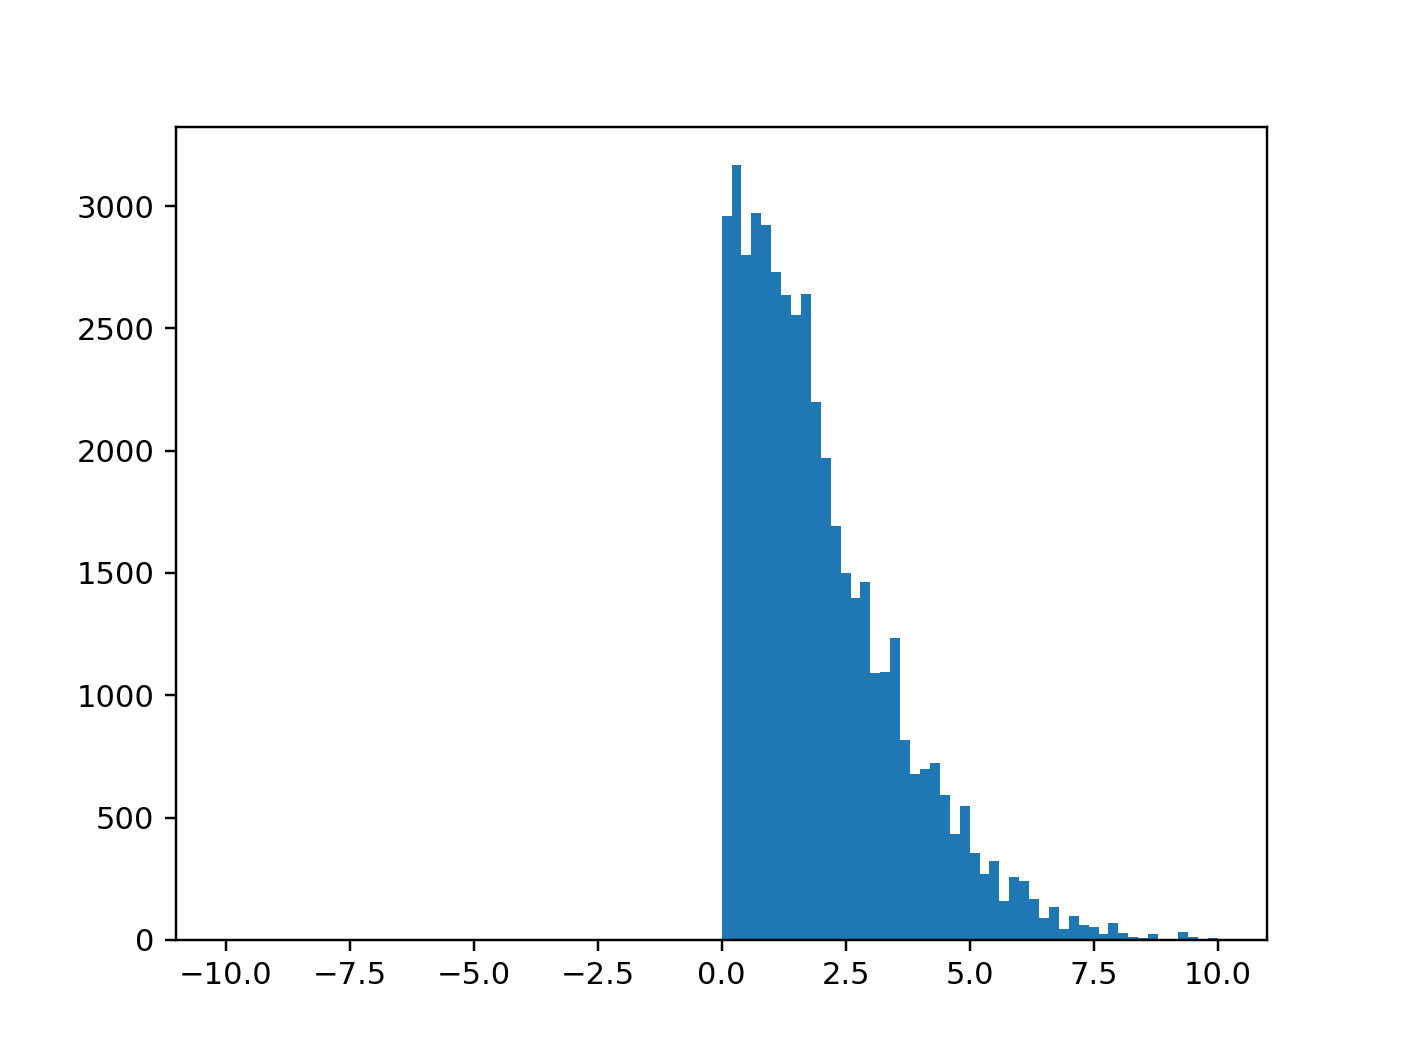

(array([   0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0., 2958., 3166., 2799., 2971.,
        2924., 2732., 2638., 2556., 2640., 2199., 1969., 1692., 1501.,
        1396., 1463., 1092., 1096., 1234.,  819.,  680.,  697.,  722.,
         592.,  432.,  548.,  356.,  269.,  323.,  157.,  256.,  240.,
         168.,   91.,  133.,   43.,   96.,   59.,   52.,   23.,   67.,
          28.,   10.,    9.,   24.,    0.,    0.,   31.,   12.,    0.,
           9.]),
 array([-10. ,  -9.8,  -9.6,  -9.4,  -9.2,  -9. ,  -8.8,  -8.6,  -8.4,
         -8.2,  -8. ,  -7.8,  -7.6,  -7.4,  -7.2,  -7. ,  -6.8,  -6.6,
         -6.4,  -6.2,  -6. ,  -5.8,  -5.6,  -5.4,  -5.2,  -5

In [25]:
# figure()
# plot(np.sort(En3d[2]))

y=np.sort(En3d[2])
ydiff=(y[1:]-y[:-1])
figure()
hist(ydiff,bins=100,range=[-10,10])

<IPython.core.display.Javascript object>


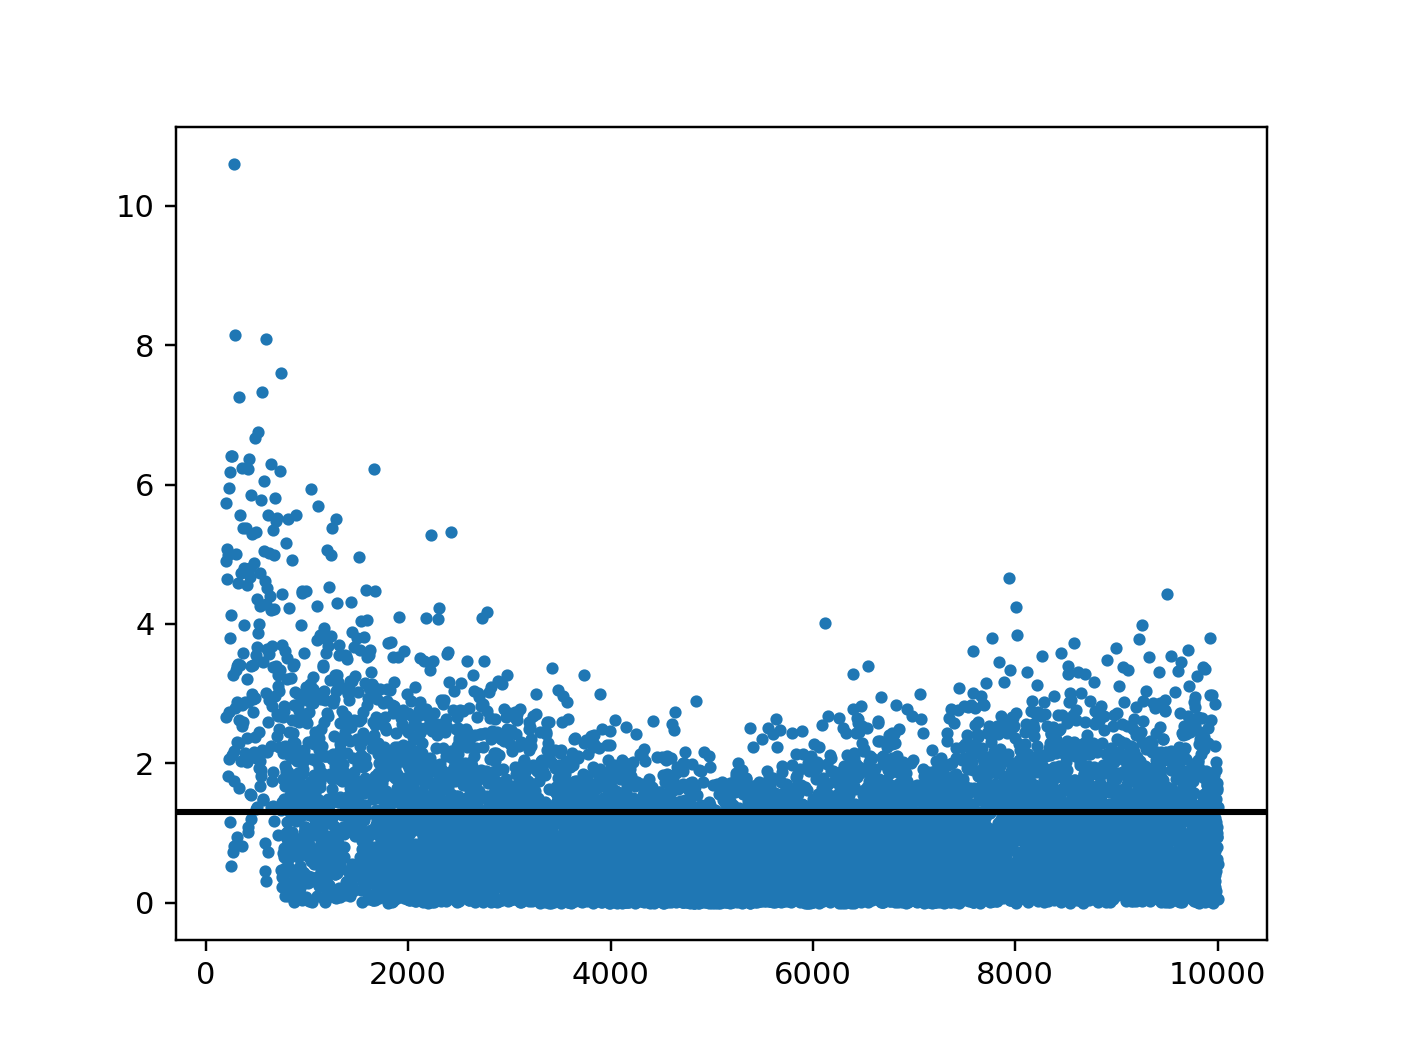

In [41]:
figure()
plot(y[1:][y[1:]<10000.],ydiff[y[1:]<10000.],".")
axhline(1.3,color="k",lw=2)

In [46]:
N=stopo[2].N ; V0=1e5 ; pad=0.2 ; accuracy=8
s=s2ds.setup_2d_schrodinger(N=N,pad=pad,V0=V0,accuracy=accuracy)
s.get_potential("SW")
s.get_eigen()

<IPython.core.display.Javascript object>


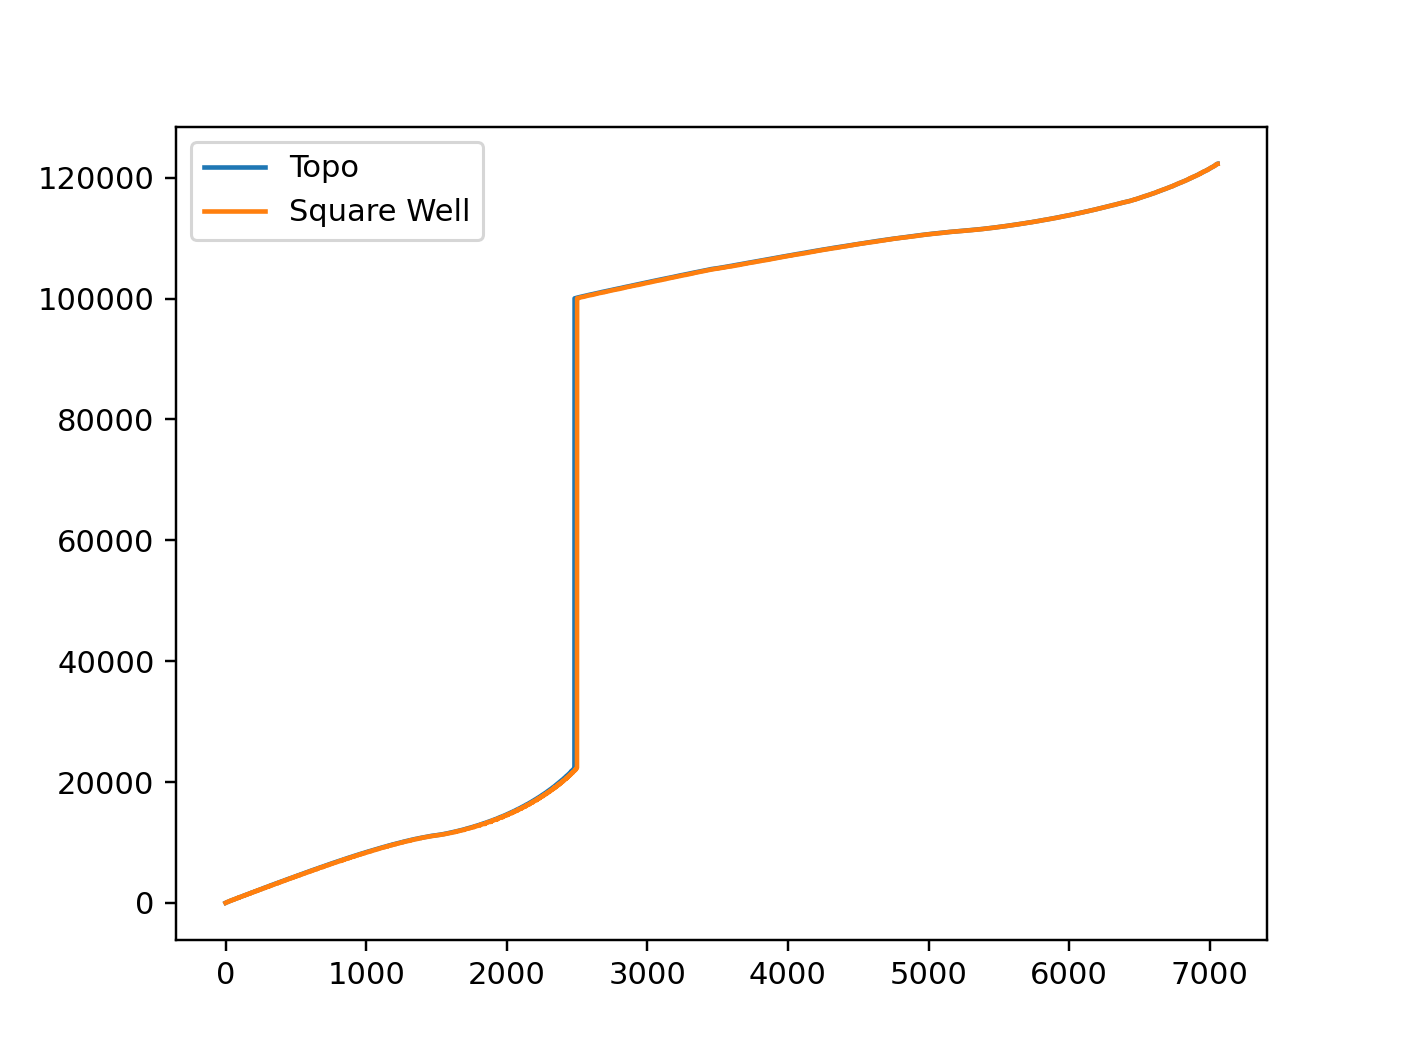

<IPython.core.display.Javascript object>


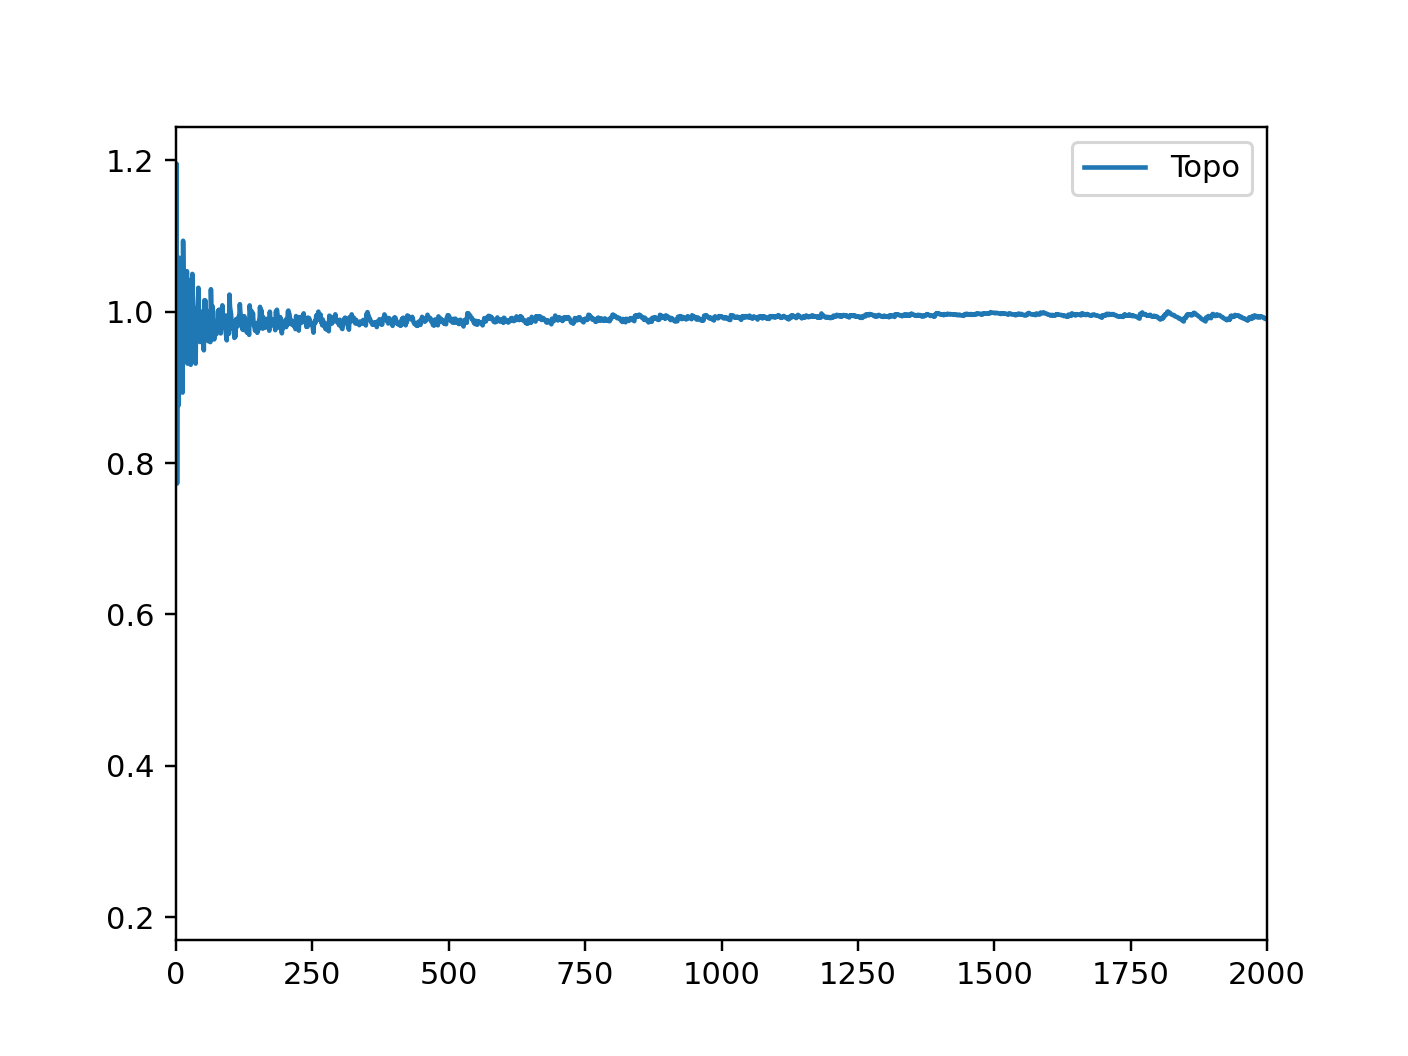

(0.0, 2000.0)

In [54]:
Esw=np.sort(stopo[2].En+stopo[2].V0)
Etopo=np.sort(s.En+s.V0)
figure()
plot(Esw,label="Topo")
plot(Etopo,label="Square Well")
legend()
# xlim(0,4500)
# ylim(0,20000)

figure()
plot(Etopo/Esw,label="Topo")
legend()
xlim(0,2000)

<IPython.core.display.Javascript object>


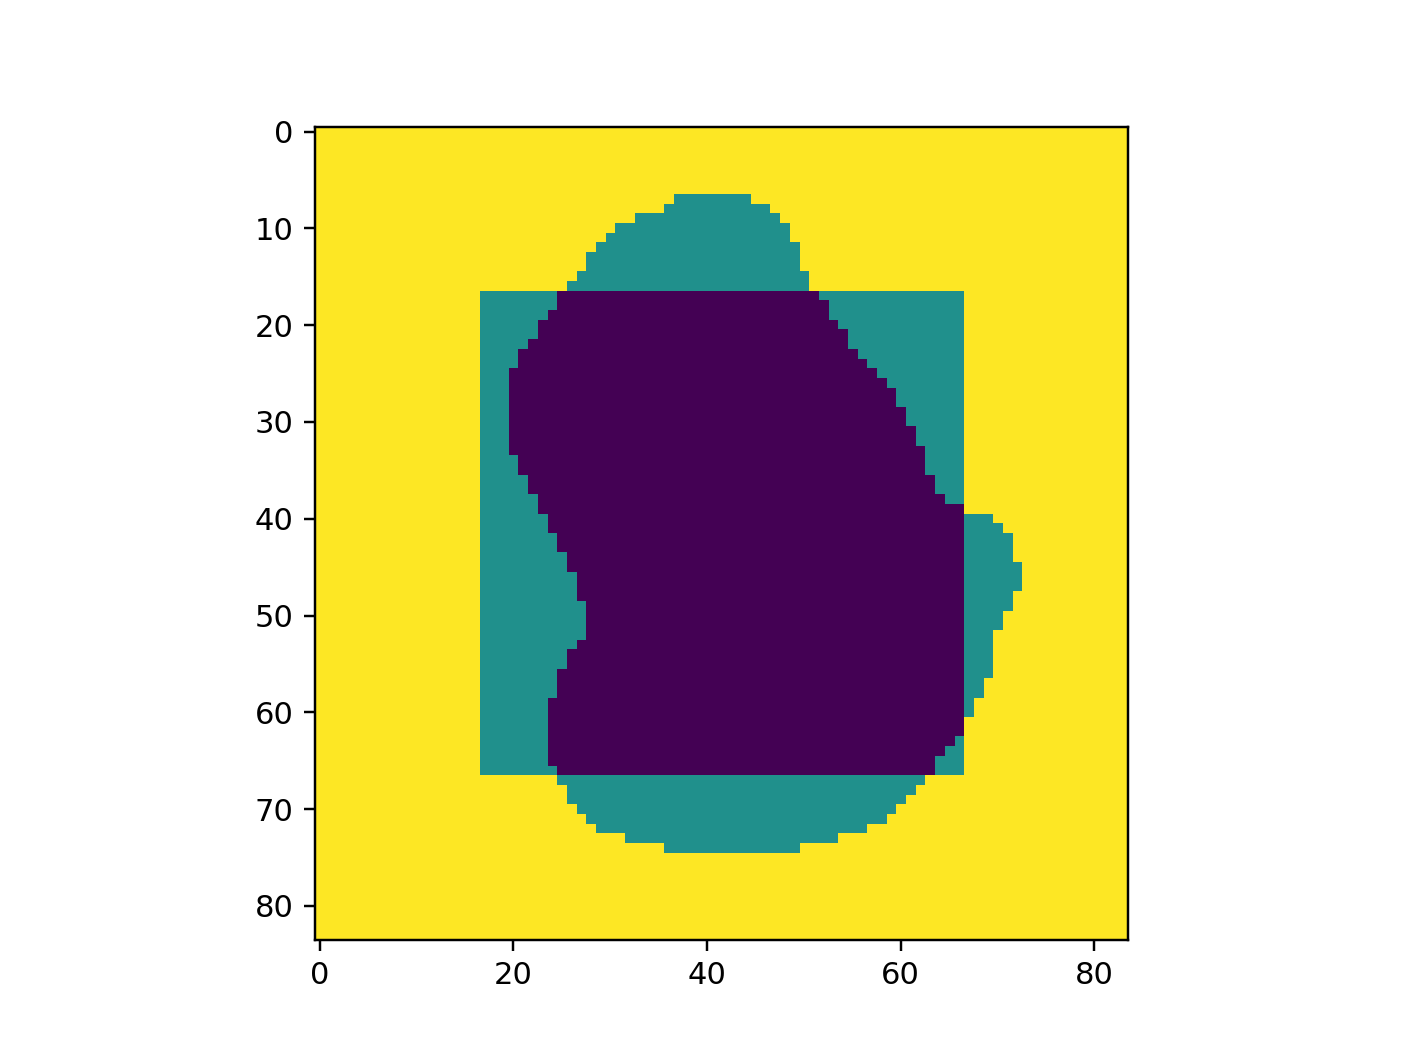

In [45]:
figure()
imshow(stopo[2].V.reshape(stopo[2].N,stopo[2].N)+s.V.reshape(s.N,s.N))

In [61]:
np.dot(stopo[2].psi[1].ravel(),stopo[2].psi[5].ravel())

-7.741203511546502e-17